In [20]:
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf

In [21]:
for dirname, _, filenames in os.walk('Cocoa_Dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        break

Cocoa_Dataset\inmature\I1.jpg
Cocoa_Dataset\mature\M1.jpg


In [23]:
data_dir = os.path.join("Cocoa_Dataset")
BATCH_SIZE = 32
IMG_SIZE = (224, 224)
train_ds = tf.keras.utils.image_dataset_from_directory(data_dir,
                                                            validation_split=0.2,
                                                            shuffle=True,
                                                            subset="training",
                                                            seed=42,
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMG_SIZE)
val_ds = tf.keras.utils.image_dataset_from_directory(data_dir,
                                                            validation_split=0.2,
                                                            subset="validation",
                                                            seed=42,
                                                            shuffle=True,
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMG_SIZE)                                                         

Found 476 files belonging to 2 classes.
Using 381 files for training.
Found 476 files belonging to 2 classes.
Using 95 files for validation.


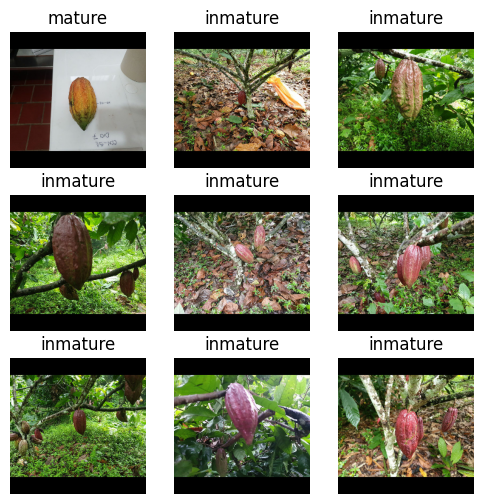

In [24]:
# Classes are docks (0), notdocks (1)
class_names = train_ds.class_names

plt.figure(figsize=(6, 6))
for images, labels in train_ds.take(1): # takes one batch of images, let's see the first 9
    #print(images.shape)
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [12]:
# GPUs are very fast for matrix computations, so we don't want the input/output of images to be a bottleneck.
# Prefetching with AUTOTUNE will help Tensorflow find the optimal way to load the images so that our GPU always has data to work on.
# More info: https://www.tensorflow.org/guide/data_performance#prefetching
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)

val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)

In [25]:
train_ds

<BatchDataset shapes: ((None, 224, 224, 3), (None,)), types: (tf.float32, tf.int32)>

In [26]:
val_ds

<BatchDataset shapes: ((None, 224, 224, 3), (None,)), types: (tf.float32, tf.int32)>